# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd
from scipy import stats

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
#Firstly, drive needs to be mounted to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/GreatLearning/Project 1_Foodhub/foodhub_order.csv')

# Check the first five rows of the data
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [7]:
testing = df.drop(columns = ['order_id','customer_id','restaurant_name'])
pd.get_dummies(testing)

cost_of_the_order  food_preparation_time  delivery_time  \
0                 30.75                     25             20   
1                 12.08                     25             23   
2                 12.23                     23             28   
3                 29.20                     25             15   
4                 11.59                     25             24   
...                 ...                    ...            ...   
1893              22.31                     31             17   
1894              12.18                     31             19   
1895              25.22                     31             24   
1896              12.18                     23             31   
1897              19.45                     28             24   

      cuisine_type_American  cuisine_type_Chinese  cuisine_type_French  \
0                         0                     0                    0   
1                         0                     0                    0   
2                         0                     0                    0   
3                         1                     0                    0   
4                         1                     0                    0   
...                     ...                   ...                  ...   
1893                      0                     0                    0   
1894                      1                     0                    0   
1895                      0                     0                    0   
1896                      0                     0                    0   
1897                      0                     0                    0   

      cuisine_type_Indian  cuisine_type_Italian  cuisine_type_Japanese  \
0                       0                     0                      0   
1                       0                     0                      1   
2                       0                     0                      0   
3                       0                     0                      0   
4                       0                     0                      0   
...                   ...                   ...                    ...   
1893                    0                     0                      0   
1894                    0                     0                      0   
1895                    0                     0                      1   
1896                    0                     0                      0   
1897                    0                     0                      1   

      cuisine_type_Korean  ...  cuisine_type_Southern  cuisine_type_Spanish  \
0                       1  ...                      0                     0   
1                       0  ...                      0                     0   
2                       0  ...                      0                     0   
3                       0  ...                      0                     0   
4                       0  ...                      0                     0   
...                   ...  ...                    ...                   ...   
1893                    0  ...                      0                     0   
1894                    0  ...                      0                     0   
1895                    0  ...                      0                     0   
1896                    0  ...                      0                     0   
1897                    0  ...                      0                     0   

      cuisine_type_Thai  cuisine_type_Vietnamese  day_of_the_week_Weekday  \
0                     0                        0                        0   
1                     0                        0                        0   
2                     0                        0                        1   
3                     0                        0                        0   
4                     0                        0                        1   
...                 ...             

In [ ]:
#Check the last five rows of the data
df.tail()

order_id  customer_id                        restaurant_name  \
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
1893        Mexican              22.31         Weekend          5   
1894       American              12.18         Weekend          5   
1895       Japanese              25.22         Weekday  Not given   
1896  Mediterranean              12.18         Weekday          5   
1897       Japanese              19.45         Weekend  Not given   

      food_preparation_time  delivery_time  
1893                     31             17  
1894                     31             19  
1895                     31             24  
1896                     23             31  
1897                     28             24

#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
#Using len() to find number of rows and columns in data
column = len(df.axes[0])
row = len(df.axes[1])
print('Number of Rows: ', row, '\nNumber of Columns: ', column)

Number of Rows:  9 
Number of Columns:  1898


#### Observations:


In the data, there are 9 rows and 1898 columns. This shows that there are 1898 entries, each having 9 different information.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


From the info() function, it can be seen that there are 3 different kind of datatypes in the DataFrame i.e. float, integer, and object datatypes. The breakdown is as follows:

Integer:
* order_id
* customer_id
* food_preparation_time
* delivery_time

Object:
* restaurant_name
* cuisine_type
* day_of_the_week
* rating

Float:
* cost_of_the_order

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
#Check if there are any null values, sum them and return the value
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
#Check if there are any duplicated order IDs
df['order_id'].duplicated().sum()

0

In [ ]:
#Check the data types to see if any entries represent missing values
for col in df:
    print(df[col].value_counts())
    print('-'*100)

1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
          ..
1478087    1
1476775    1
1478421    1
1476774    1
1478056    1
Name: order_id, Length: 1898, dtype: int64
----------------------------------------------------------------------------------------------------
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64
----------------------------------------------------------------------------------------------------
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
-----------

In [ ]:
#It can be observed that there are some missing values in 'rating', in the form of 'Not given'.
#Convert the count of ratings into percentage to know the proportion of missing values
round(df['rating'].value_counts()/len(df['rating'])*100,2)

Not given    38.78
5            30.98
4            20.34
3             9.91
Name: rating, dtype: float64

In [ ]:
#Checking if people more likely to vote on weekday vs weeked

#Finding the percentage of unrated data during weekdays
weekday = df.loc[df['day_of_the_week']=='Weekday'] #Create a DF of weekday data
weekday_count = weekday['rating'].value_counts() #Count the number of unique ratings in teh weekday data
weekday_percent = weekday_count/len(weekday)*100 #Convert it into percentage

#Do the same for weekend data
weekend = df.loc[df['day_of_the_week']=='Weekend']
weekend_count = weekend['rating'].value_counts()
weekend_percent = weekend_count/len(weekend)*100

print(weekday_percent,weekend_percent)

Not given    37.842779
5            30.712980
4            19.926874
3            11.517367
Name: rating, dtype: float64 Not given    39.156181
5            31.088083
4            20.503331
3             9.252406
Name: rating, dtype: float64


#### Observations:



1. Even though there were no null values in the data, it can be observed and infered that there are missing values in the column 'rating' in the form of 'Not given'.

2. Moreover, there are more missing values than rated values too. It is not recommended to remove these data.

3. Upon checking against the day of the week, it can be seen that more customers left out the rating during weekdays, likely due to being busy

4. Having missing data in this column can give us insights into why some customers do not provide ratings, and that can be used to improve the feedback loop for our continuous improvement in the future.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
#Check the statistical summary of the data
df.describe(include='all').T

count unique          top  freq           mean  \
order_id               1898.0    NaN          NaN   NaN      1477495.5   
customer_id            1898.0    NaN          NaN   NaN  171168.478398   
restaurant_name          1898    178  Shake Shack   219            NaN   
cuisine_type             1898     14     American   584            NaN   
cost_of_the_order      1898.0    NaN          NaN   NaN      16.498851   
day_of_the_week          1898      2      Weekend  1351            NaN   
rating                   1898      4    Not given   736            NaN   
food_preparation_time  1898.0    NaN          NaN   NaN       27.37197   
delivery_time          1898.0    NaN          NaN   NaN      24.161749   

                                 std        min         25%        50%  \
order_id                  548.049724  1476547.0  1477021.25  1477495.5   
customer_id            113698.139743     1311.0    77787.75   128600.0   
restaurant_name                  NaN        NaN         NaN        NaN   
cuisine_type                     NaN        NaN         NaN        NaN   
cost_of_the_order           7.483812       4.47       12.08      14.14   
day_of_the_week                  NaN        NaN         NaN        NaN   
rating                           NaN        NaN         NaN        NaN   
food_preparation_time       4.632481       20.0        23.0       27.0   
delivery_time               4.972637       15.0        20.0       25.0   

                              75%        max  
order_id               1477969.75  1478444.0  
customer_id              270525.0   405334.0  
restaurant_name               NaN        NaN  
cuisine_type                  NaN        NaN  
cost_of_the_order         22.2975      35.41  
day_of_the_week               NaN        NaN  
rating                        NaN        NaN  
food_preparation_time        31.0       35.0  
delivery_time                28.0       33.0

In [ ]:
#Since there are 4 categorical variables, lets create a list of all categorical variables
cat_cols = ['restaurant_name','cuisine_type','day_of_the_week','rating']

#Print out the categorical variables to study the distribution
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64
--------------------------------------------------
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64
--------------------------------------------------
Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64
--------------------------------------------------
Not given    736
5        

In [ ]:
#Checking the min, average and max time taken for food to be prepared
min = df['food_preparation_time'].min()
max = df['food_preparation_time'].max()
mean = df['food_preparation_time'].mean()

print('It takes an average of ', round(mean,2), ' minutes for the food to be prepared.\nIt takes a minimum of ',round(min,2),'minutes for the food to be prepared.\nIt takes a maximum of ',round(max,2),'minutes for the food to be prepared.')

It takes an average of  27.37  minutes for the food to be prepared.
It takes a minimum of  20 minutes for the food to be prepared.
It takes a maximum of  35 minutes for the food to be prepared.


#### Observations:


1. There are a few overwhelming popular cuisine types as well as restaurant names.
2. There are more than 2 times the number of orders over the weekends as compared to the weedays
3. Average cost of an order is $16.50
4. The time taken for food to be prepared is:

* It takes an average of  **27.37**  minutes for the food to be prepared.
* It takes a minimum of  **20** minutes for the food to be prepared.
* It takes a maximum of  **35** minutes for the food to be prepared.

### **Question 5:** How many orders are not rated?

In [ ]:
#lets assign a new dataframe to show the count of each value in 'rating'
x = pd.DataFrame(df['rating'].value_counts())

#Rename the column to 'Count'
x.rename(columns={'rating':'Count'}, inplace= True)

#Add another column to show  the Percentage
x['Percentage'] = x/len(df['rating'])*100

print(x)

           Count  Percentage
Not given    736   38.777661
5            588   30.979979
4            386   20.337197
3            188    9.905163


#### Observations:


738 out of the 1898 orders were not rated. 38.78% of the orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

**Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

####Food Preparation Time

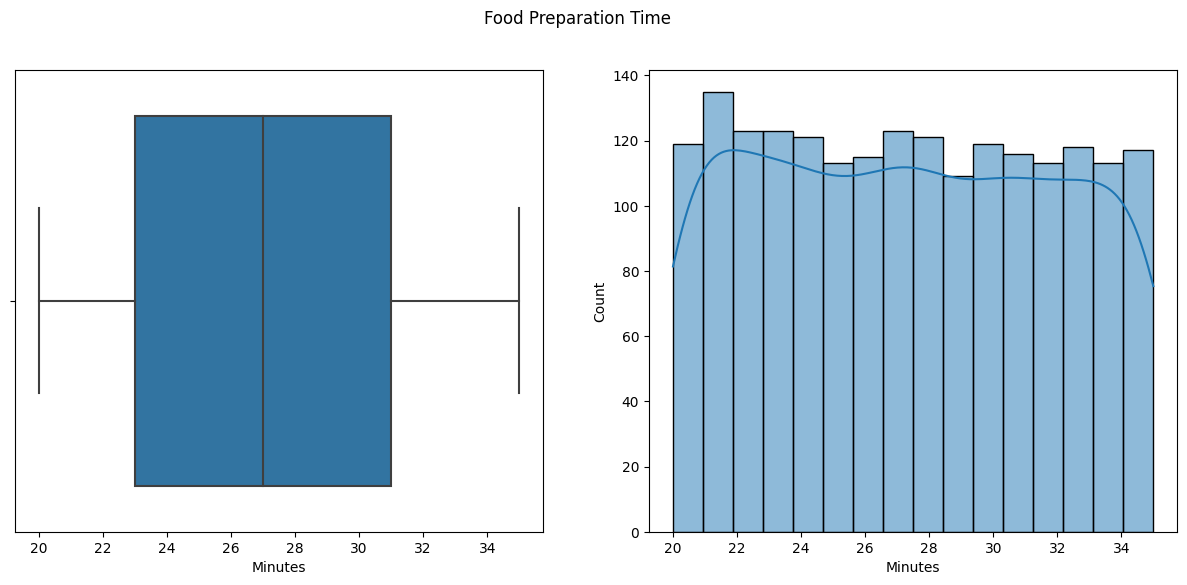

In [ ]:
#Setting the figure size
plt.figure(figsize = (15,6))

#Plot a boxplot in the first subplot to see distribution and 5 number summary
plt.subplot(121)
sns.boxplot(data=df,x='food_preparation_time')
plt.xlabel('Minutes')
sns.axes_style('whitegrid')

#Plot a histogram in the second subplot to show distribution shape
plt.subplot (122)
sns.histplot(
    data = df,
    x = 'food_preparation_time',
    bins = df['food_preparation_time'].max()- df['food_preparation_time'].min()+1, #Here, the number of bins needed to be specified as the default number of bins is not suitable for visualization.
    kde = True)
plt.xlabel('Minutes')
sns.axes_style('whitegrid')

#Labelling the subplots with the same title
plt.suptitle('Food Preparation Time')
plt.show()


#####Observations:

* The time needed for food to be prepared is almost uniformly distributed between 20 to 35 minutes.
* The average preparation time needed is around 27.37 minutes, but the most common food preparation time is around 21 minutes.
* The time needed for food to be prepared is likely to be affected by the type of cuisine as well, which can be analyze later in multivariate analysis.

####Delivery Time

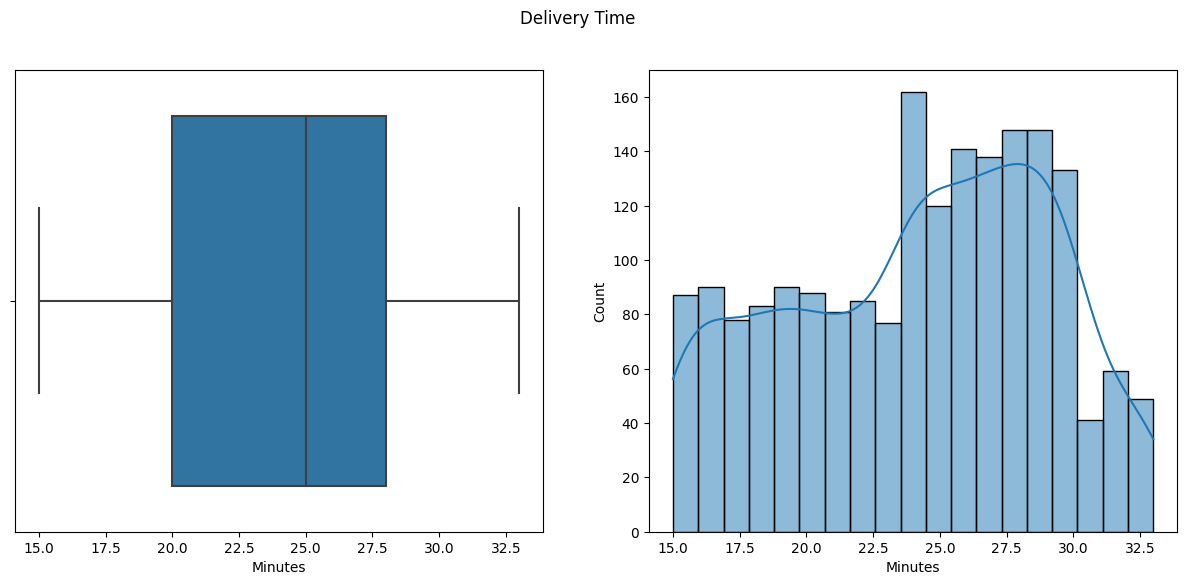

In [ ]:
#Setting the figure size
plt.figure(figsize = (15,6))

#Plot a boxplot in the first subplot to see distribution and 5 number summary
plt.subplot(121)
sns.boxplot(data=df,x='delivery_time')
plt.xlabel('Minutes')
sns.axes_style('whitegrid')

#Plot a histogram in the second subplot to show distribution shape
plt.subplot (122)
sns.histplot(
    data = df,
    x = 'delivery_time',
    bins = df['delivery_time'].max() - df['delivery_time'].min() + 1,
    kde = True)
plt.xlabel('Minutes')
sns.axes_style('whitegrid')

#Labelling the subplots with the same title
plt.suptitle('Delivery Time')
plt.show()

#####Observations:

* The time needed for food to be delivered is slightly skewed to the left.
* There is a significantly common delivery time of 25 to 30 minutes.

####Cost of Order

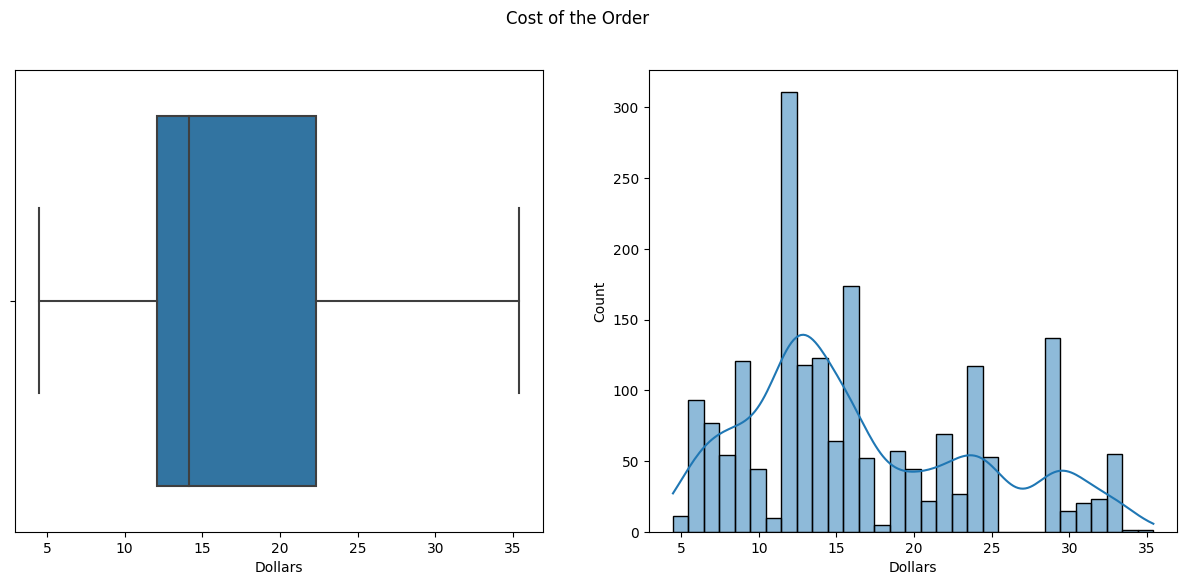

In [ ]:
#Setting the figure size
plt.figure(figsize = (15,6))

#Plot a boxplot in the first subplot to see distribution and 5 number summary
plt.subplot(121)
sns.boxplot(data=df,x='cost_of_the_order')
plt.xlabel('Dollars')
sns.axes_style('whitegrid')

#Plot a histogram in the second subplot to show distribution shape
plt.subplot (122)
sns.histplot(
    data = df,
    x = 'cost_of_the_order',
    bins = int(df['cost_of_the_order'].max() - df['cost_of_the_order'].min() + 1),
    kde = True)
plt.xlabel('Dollars')
sns.axes_style('whitegrid')

#Labelling the subplots with the same title
plt.suptitle('Cost of the Order')
plt.show()

#####Observations:

1. It appears that the cost of food can be segmented into different categories from cheap to expensive.
* Tier 1 Lower than 11 dollars
* Tier 2 12 - 17 dollars
* Tier 3 18 - 25 dollars
* Tier 4 higher than 26 dollars
2. The most common price is around 12 dollars. It is significantly more common than the other pricing

In [ ]:
#This is to segmentize the cost according to the tier that was observed
df['cost_tier'] = pd.cut(
    df['cost_of_the_order'],
    bins=[0,11,18,25,36],
    labels=['Tier 1','Tier 2','Tier 3','Tier 4'],
    right = False)
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time cost_tier  
0             20    Tier 4  
1             23    Tier 2  
2             28    Tier 2  
3             15    Tier 4  
4             24    Tier 2

####Restaurant

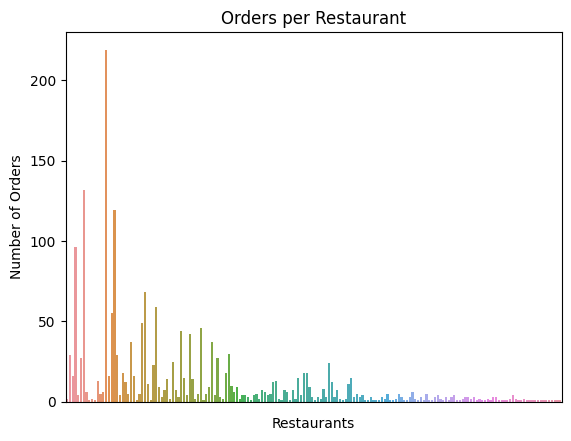

In [ ]:
#This is to plot a bar chart to count the number of orders per restaurant
ax = sns.countplot(data = df, x = 'restaurant_name',)

#This is to remove the x axis values, as there are too many unique restaurant names to fit.
ax.set(xticklabels=[])
ax.tick_params(bottom = False)

plt.title('Orders per Restaurant')
plt.xlabel('Restaurants')
plt.ylabel('Number of Orders')

plt.show()


#####Observations:

1. From the plot, it can be seen that some restaurants are significantly more popular than other restaurants.
2. Although the restaurant names cannot be seen from the plot, it can be found that the top 5 most popular restaurants are:
* Shake Shack - 219
* The Meatball Shop - 132
* Blue Ribbon Sushi - 119
* Blue Ribbon Fried Chicken - 96
* Parm - 68
3. The restaurants be grouped into cuisine types to understand what makes these restaurants so popular, which can be looked into in Multivariate Analysis later.

####Cuisine Type

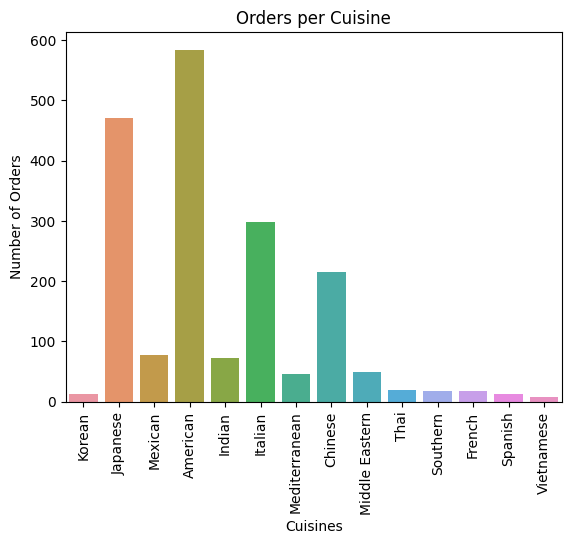

In [ ]:
#Plotting the bar chart
sns.countplot(data = df, x = 'cuisine_type',)

#Customizing the chart
plt.title('Orders per Cuisine')
plt.xlabel('Cuisines')
plt.xticks(rotation = 90) # To tilt the x variable names, for better visualization
plt.ylabel('Number of Orders')

#Show the chart
plt.show()

#####Observations:

1. From the chart, there are 4 cuisines that are significantly more popular than the other cuisines:
* American - 584
* Japanese - 470
* Italian - 298
* Chinese - 215
2. The rest of the cuisines have been ordered less than a 100 times, less than half of the chinese cuisine.


####Weekend vs Weekday

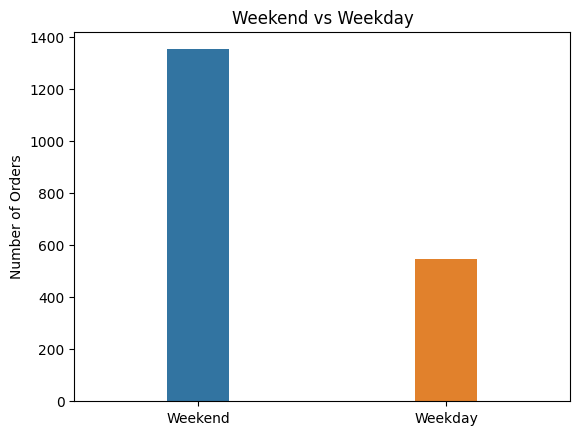

In [ ]:
#Plot the chart
sns.countplot(data = df, x = 'day_of_the_week',width = 0.25) #Reduce the width of the bar to ease the eyes

#Customize the chart
plt.title('Weekend vs Weekday')
plt.xlabel('')
plt.ylabel('Number of Orders')

#Show the chart
plt.show()

#####Observations:

1. More than twice of the orders were made over the weekends than the orders made over weekdays.
2. This is counter intuitive to the idea that New Yorkers are relying on food delivery due to their busy schedule. Customers prefer to order food during the weekends when they are more free, as compared to the weekdays where they are likely to be busier. This could be due to reasons such as having more house gatherings over the weekend, causing more food to be delivered.

#### Rating

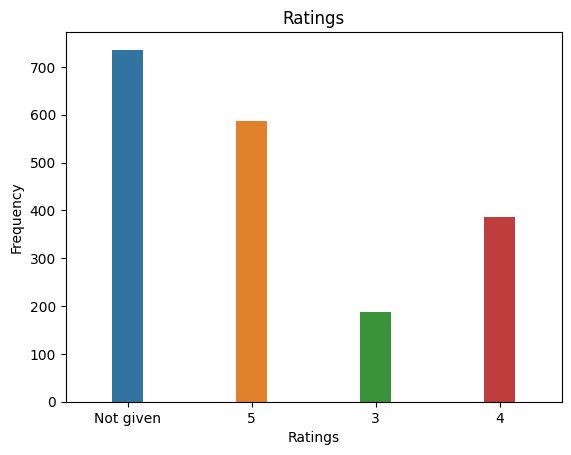

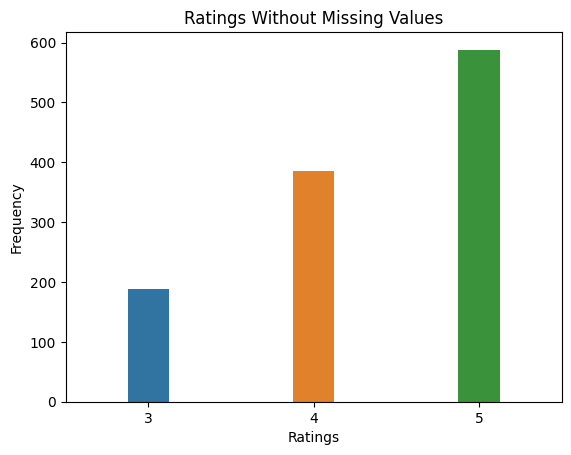

In [ ]:
#Plot the chart
sns.countplot(data = df, x = 'rating',width = 0.25)

#Customize the chart
plt.title('Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

#Show the chart
plt.show()

#As the data contains missing values, the chart will be plotted again after removing the missing values
#Dropping all rows with 'Not given' as rating and assigning it to new dataframe
dfrate = df.drop(df[df['rating'] == 'Not given'].index)
dfrate['rating'] = dfrate['rating'].apply(pd.to_numeric,) #Converting the remaining data in rating column of the new dataframe to integers
df['nrating'] = dfrate['rating'] # Creating a new column in df dataframe and naming it nrating

#Plotting the bar chart of ratings without missing values
sns.countplot(data = dfrate, x = 'rating',width = 0.25)

plt.title('Ratings Without Missing Values')
plt.xlabel('Ratings')
plt.ylabel('Frequency')

print('') # To separate the plots for presentation
plt.show()

#####Observations:

1. No customer rated 1 or 2.
2. Most number of ratings were 5
3. More inferences can be made from the ratings in multivariate analysis later.
4. As there were many missing data, some potential causes can be investigated:
* Customers who were not as satisfied with the services did not even bothered to leave a rating
* When customers are more busy, such as during the weekdays, they are less likely to give a rating
* When ordering from a particular restaurant, the user experience on the application could be different, making it difficult to leave rating on the application.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [ ]:
x = pd.DataFrame(df['restaurant_name'].value_counts())
print(x)

                           restaurant_name
Shake Shack                            219
The Meatball Shop                      132
Blue Ribbon Sushi                      119
Blue Ribbon Fried Chicken               96
Parm                                    68
...                                    ...
Sushi Choshi                             1
Dos Caminos Soho                         1
La Follia                                1
Philippe Chow                            1
'wichcraft                               1

[178 rows x 1 columns]


#### Observations:


The top 5 restaurants are:
1. Shake Shack - 219
2. The Meatball Shop - 132
3. Blue Ribbon Sushi - 119
4. Blue Ribbon Fried Chicken - 96
5. Parm - 68

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
# This will split the data from weekend and weekdays into the cuisine type and count each unique values
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts()

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

#### Observations:


The American cuisine is the most popular cuisine that was ordered on the weekends.


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
#Get the number of orders that costs more than 20 dollars
number = len(df.loc[df['cost_of_the_order']>20])

#Get the percentage of those orders over the total number of orders
percent = number/len(df)*100

print(round(percent,2))

29.24


#### Observations:


29.2% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [ ]:
overall = df['delivery_time'].mean()
print(round(overall,2))

24.16


#### Observations:


The overall average delivery time is 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
df['customer_id'].value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:


The top 3 most frequent customers are:
1. Customer ID 52832 with 13 orders
2. Customer ID 47440 with 10 orders
3. Customer ID 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

Here are some relationships that can be explored:
1.  which **cuisine type** has higher order count or average rating?
2.	which **restaurant** has higher order count or average rating?
3.	Does the **price of order** affect order count or average rating?
4.	Does the **total waiting time** affect order count or average rating?
5.	Does the **day of the week** affect the order count or average rating?
6.	Does the **day of the week** affect the type of cuisine ordered?
7.	Do **repeating customers** prefer to explore different cuisine or same cuisine?


####Cuisine Type vs Profit

In [ ]:
#Creating the respective series for each study

#Cuisine vs Order Count
order = df.groupby(['cuisine_type'])['order_id'].count()
##Cuisine vs Average Rating
rating = df.groupby(['cuisine_type'])['nrating'].mean()
#Cuisine vs Total Profit
cost = df.groupby(['cuisine_type'])['cost_of_the_order'].sum()
#Cuisine vs Number of Restaurants
restaurant = df.groupby(['cuisine_type'])['restaurant_name'].nunique()

#Combining the series into dataframe
cuisine = pd.concat([order,rating,cost,restaurant],axis = 1)
cuisine.reset_index(inplace = True)
cuisine.columns = ['Cuisine Type','Order Count','Avg Rating','Total Profit','No of Restaurants']

print(cuisine)
print('-'*50,'Most Ordered Cuisine','-'*50)
print(rating.sort_values(ascending=False).head())
print('-'*50,'Highest Rated Cuisine','-'*50)
print(order.sort_values(ascending=False).head())
print('-'*50,'Highest Earning Cuisine','-'*50)
print(cost.sort_values(ascending=False).head())
print('-'*50,'Highest Number of Restaurants','-'*50)
print(restaurant.sort_values(ascending=False).head())

      Cuisine Type  Order Count  Avg Rating  Total Profit  No of Restaurants
0         American          584    4.298913       9530.78                 41
1          Chinese          215    4.338346       3505.62                 16
2           French           18    4.300000        356.29                  3
3           Indian           73    4.540000       1235.14                 14
4          Italian          298    4.360465       4892.77                 31
5         Japanese          470    4.373626       7663.13                 29
6           Korean           13    4.111111        182.02                  5
7    Mediterranean           46    4.218750        711.84                  5
8          Mexican           77    4.416667       1303.85                 11
9   Middle Eastern           49    4.235294        922.21                  7
10        Southern           17    4.307692        328.11                  2
11         Spanish           12    4.833333        227.93                  3

#####Observations:

* The 5 highest selling cuisine is also the 5 highest earning cuisine.
* Spanish cuisine has the highest rating amonst all the cuisine types, but they have a low number of orders, implying that the rating is not stable enough to work with.
* Japanese cuisine has higher rating than American cuisine.
* There are more Italian restaurants than Japanese restaurants, but Japanese cuisine still earn almost twice the amount of money Italian cuisine did.


In [ ]:
#Average money earned per cuisine
cuisine_money = df.groupby(['cuisine_type'])['cost_of_the_order'].sum()
cuisine_restaurants = df.groupby(['cuisine_type'])['restaurant_name'].nunique()
cuisine_average = cuisine_money/cuisine_restaurants
cuisine_average.sort_values(ascending=False)

cuisine_type
Japanese          264.245862
American          232.458049
Chinese           219.101250
Southern          164.055000
Italian           157.831290
Mediterranean     142.368000
Middle Eastern    131.744286
French            118.763333
Mexican           118.531818
Indian             88.224286
Spanish            75.976667
Thai               40.550000
Korean             36.404000
Vietnamese         30.060000
dtype: float64

As can be seen in the table above, the average money earned per outlet per cuisine is the highest for Japanese cuisine.

#### Restaurant vs Profit

In [ ]:
#Money earned by each restaurant
restaurant_money = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False)
#Number of orders per restaurant
restaurant_order = df.groupby(['restaurant_name'])['order_id'].nunique().sort_values(ascending=False)
#Average rating per restaurant
restaurant_rating = df.groupby(['restaurant_name'])['nrating'].mean().sort_values(ascending=False)

#Create a dataframe on the restaurant statistics
restaurant = pd.concat([restaurant_order,restaurant_money,restaurant_rating],axis = 1)
restaurant['Average Cost per Order'] = round(restaurant_money / restaurant_order,2)
restaurant.columns = ['Order Count', 'Total Profit','Avg Rating','Average Cost per Order']

restaurant

Order Count  Total Profit  Avg Rating  \
restaurant_name                                                    
Shake Shack                        219       3579.53    4.278195   
The Meatball Shop                  132       2145.21    4.511905   
Blue Ribbon Sushi                  119       1903.95    4.219178   
Blue Ribbon Fried Chicken           96       1662.29    4.328125   
Parm                                68       1112.76    4.128205   
...                                ...           ...         ...   
Klong                                1         29.05    5.000000   
Kambi Ramen House                    1         32.93    5.000000   
Il Bambino                           1         29.25    4.000000   
Hunan Manor                          1          5.72    5.000000   
Lamarca Pasta                        1          9.22         NaN   

                           Average Cost per Order  
restaurant_name                                    
Shake Shack                                 16.34  
The Meatball Shop                           16.25  
Blue Ribbon Sushi                           16.00  
Blue Ribbon Fried Chicken                   17.32  
Parm                                        16.36  
...                                           ...  
Klong                                       29.05  
Kambi Ramen House                           32.93  
Il Bambino                                  29.25  
Hunan Manor                                  5.72  
Lamarca Pasta                                9.22  

[178 rows x 4 columns]

#####Observations:

* Shake Shack is more popular then the other restaurants available, even if the average cost per order is not the highest
* Most of the restaurants with the highest number of orders are rated between 4 - 4.5
* Many of the highest earning restaurants belong to cost tier 2

#### Order Cost vs Profit

In [ ]:
#Creating a series for Cost vs Average Rating
cost_rating = df.groupby(['cost_tier'])['nrating'].mean()
#Creating a series for Cost vs order counts
cost_order = df.groupby(['cost_tier'])['order_id'].nunique()
#Creating a series for Cost vs income generated
cost_profit = df.groupby(['cost_tier'])['cost_of_the_order'].sum()

#Combining the series into dataframe
cost = pd.concat([cost_order,cost_rating,cost_profit],axis = 1)
cost.columns = ['Order Count','Avg Rating','Total Profit'] #Rename Columns

cost

Order Count  Avg Rating  Total Profit
cost_tier                                       
Tier 1             404    4.299578       3119.23
Tier 2             849    4.333333      11697.04
Tier 3             340    4.427230       7489.89
Tier 4             305    4.336683       9008.66

#####Observations:

* Seems like tier 2 orders are more commonly ordered, but tier 3 orders are more highly rated.
* Even though there were lesser number of tier 4 orders, the profit made is still higher than tier 3 orders

####Waiting Time vs Order Count and Rating

In [ ]:
#Combinine the delivery time and food preparation time because customers don't differentiate these 2
df['waiting time'] = df['delivery_time'] + df['food_preparation_time']

#Creating a df of waiting time vs average rating
time_rating = df.groupby(['waiting time'])['nrating'].mean()

#Creating a df of waiting time vs order count
time_order = df.groupby(['waiting time'])['order_id'].nunique()

#Checking for correlation between waiting time and total time waiting for food
print('Corerlation between:\n')
print('Total waiting time vs average rating:', round(df['waiting time'].corr(time_rating),2))
print('Food prep time vs average rating:', round(df['food_preparation_time'].corr(time_rating),2))
print('Delivery time vs average rating:', round(df['delivery_time'].corr(time_rating),2))
print('Total waiting time vs order count:', round(df['delivery_time'].corr(time_order),2))

Corerlation between:

Total waiting time vs average rating: 0.03
Food prep time vs average rating: -0.26
Delivery time vs average rating: 0.28
Total waiting time vs order count: -0.07


####Waiting Time vs Cuisine

In [ ]:
#cuisine_time_mode.rename('mode')
cuisine_time = df.groupby(['cuisine_type'])['waiting time']
cuisine_time_mode = df.groupby(['cuisine_type'])['waiting time'].agg(pd.Series.mode)

#cuisine_time_mean.rename('mean')
cuisine_time_mean = round(df.groupby(['cuisine_type'])['waiting time'].mean(),2)

#Combining them into one df for presentation
cuisine_time_df = pd.concat([cuisine_time_mode,cuisine_time_mean],axis = 1)
cuisine_time_df.columns = ['mode','mean']

cuisine_time_df.sort_values(by=['mean'],ascending = False)


mode   mean
cuisine_type                                       
French                                    49  52.22
Italian                             [53, 56]  52.05
Vietnamese      [46, 47, 50, 51, 54, 56, 59]  51.86
Japanese                                  54  51.64
American                                  54  51.63
Southern                    [40, 50, 53, 56]  51.41
Chinese                                   52  51.37
Indian                                    47  51.19
Mexican                             [49, 54]  51.12
Middle Eastern                      [56, 58]  50.76
Mediterranean                   [46, 48, 54]  50.59
Thai                                      48  50.47
Spanish                                   50  50.33
Korean                              [45, 52]  46.38

* There's no significant difference between cuisine type and how it affects the total waiting time
* The difference from the afastest to slowest cuisine on average is approximately 6 minutes.
* There is a very weak negative correlation between total waiting time and order count.

####Day of Week vs Order Count and Rating

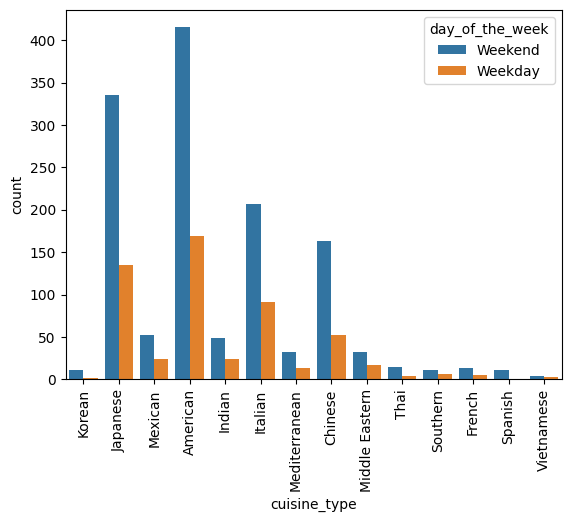

Weekdays:
                 cuisine_type
American           30.895795
Japanese           24.680073
Italian            16.636197
Chinese             9.506399
Mexican             4.387569
Indian              4.387569
Middle Eastern      3.107861
Mediterranean       2.559415
Southern            1.096892
French              0.914077
Thai                0.731261
Vietnamese          0.548446
Korean              0.365631
Spanish             0.182815 

Weekends:
                 cuisine_type
American           30.717987
Japanese           24.796447
Italian            15.321984
Chinese            12.065137
Mexican             3.923020
Indian              3.626943
Mediterranean       2.368616
Middle Eastern      2.368616
Thai                1.110289
French              0.962250
Korean              0.814212
Southern            0.814212
Spanish             0.814212
Vietnamese          0.296077


In [ ]:
#Plotting a bar chart to see if particular cuisines arem ore preferred over the day of the week.
sns.countplot(data=df, x='cuisine_type', hue = 'day_of_the_week')
plt.xticks(rotation = 90)
plt.show()

#Finding the percentage of each cuisine ordered during weekdays
weekday = df.loc[df['day_of_the_week']=='Weekday'] #Create a DF of weekday data
weekday_count = weekday['cuisine_type'].value_counts() #Count the number of unique cuisines in the weekday data
weekday_percent = weekday_count/len(weekday)*100 #Convert it into percentage

#Do the same for weekend data
weekend = df.loc[df['day_of_the_week']=='Weekend']
weekend_count = weekend['cuisine_type'].value_counts()
weekend_percent = weekend_count/len(weekend)*100

print('Weekdays:\n',weekday_percent.to_frame(),'\n\nWeekends:\n',weekend_percent.to_frame())

#####Observations:

* Get more data like monday tuesday etc
* It can be seen that over the weekends, all of the cuisines were ordered more than over the weekdays
* There are also no obvious difference in cuisine preference between the day of the week.

####Day of the week vs cuisine

####Repeating Customers' Cuisine Preference

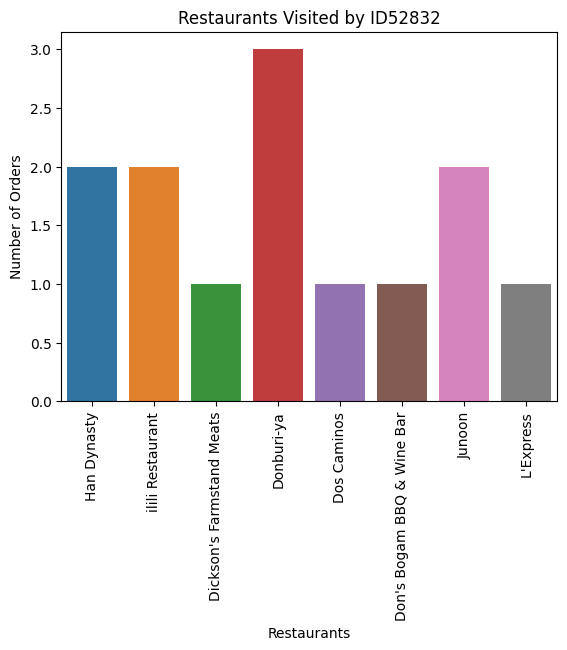

restaurant_name
Dickson's Farmstand Meats     15.72
Don's Bogam BBQ & Wine Bar    12.23
Donburi-ya                    30.51
Dos Caminos                   16.06
Han Dynasty                   31.53
Junoon                        54.66
L'Express                     24.20
ilili Restaurant              40.89
Name: cost_of_the_order, dtype: float64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


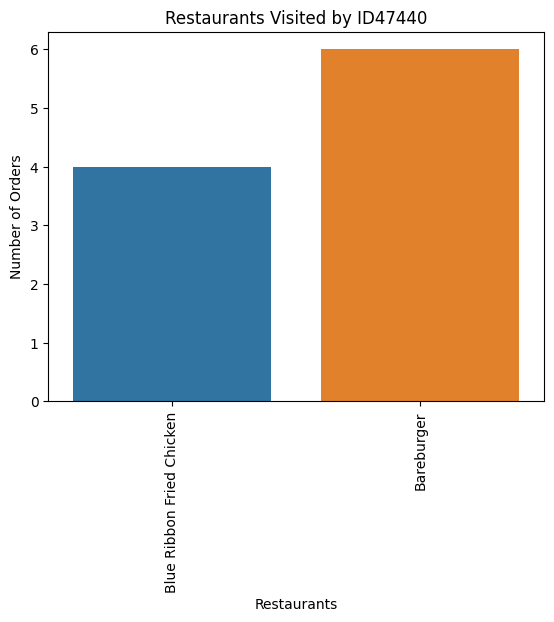

restaurant_name
Bareburger                   102.15
Blue Ribbon Fried Chicken     56.03
Name: cost_of_the_order, dtype: float64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


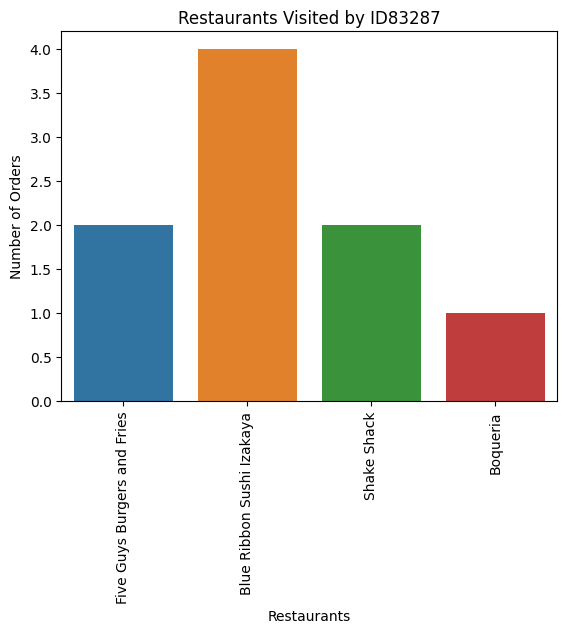

restaurant_name
Blue Ribbon Sushi Izakaya      66.07
Boqueria                       14.50
Five Guys Burgers and Fries    40.31
Shake Shack                    18.43
Name: cost_of_the_order, dtype: float64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


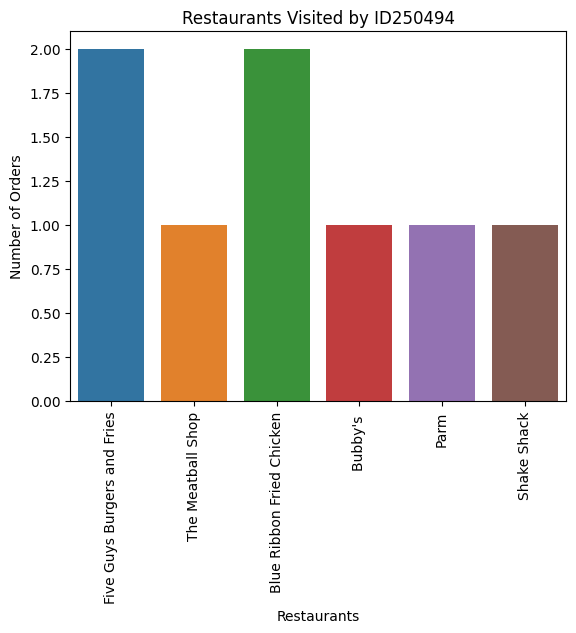

restaurant_name
Blue Ribbon Fried Chicken      50.44
Bubby's                        24.25
Five Guys Burgers and Fries    57.23
Parm                           28.57
Shake Shack                    12.18
The Meatball Shop              11.16
Name: cost_of_the_order, dtype: float64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


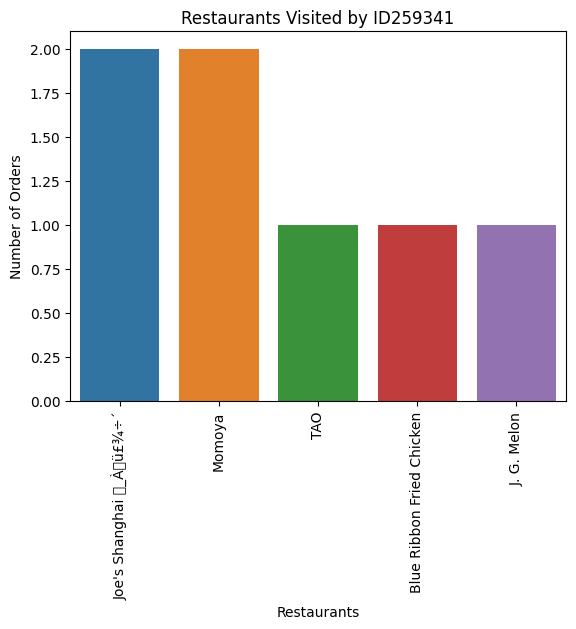

restaurant_name
Blue Ribbon Fried Chicken     8.39
J. G. Melon                  29.05
Joe's Shanghai _Àü£¾÷´     31.91
Momoya                       48.75
TAO                          12.71
Name: cost_of_the_order, dtype: float64
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
#Finding the top 5 most frequent customers
customer_count = df['customer_id'].value_counts().nlargest(5)

#Finding out which restaurants these customers like to order from
for i in customer_count.index.to_list():
  x = df.loc[(df['customer_id'] == i)]

  #Plot the barchart of each restaurant for each customer
  bar = sns.countplot(data=x,x='restaurant_name')
  plt.title('Restaurants Visited by ID%i' % i)
  plt.xlabel('Restaurants')
  plt.xticks(rotation = 90)
  plt.ylabel('Number of Orders')
  plt.show()

  #Tabulate how much repeating customers spent on each cuisine
  spent = x.groupby(['restaurant_name'])['cost_of_the_order'].sum()
  print(spent)

  print('-'*200)

#####Observations:

From the graphs, it can be seen that
* repeating customers will have one or 2 favourites,
* 4 out of 5 of them are willing to explore other restaurants
* The amount that customers are willing to spend to explore mostly lies in cost tier 2 orders.

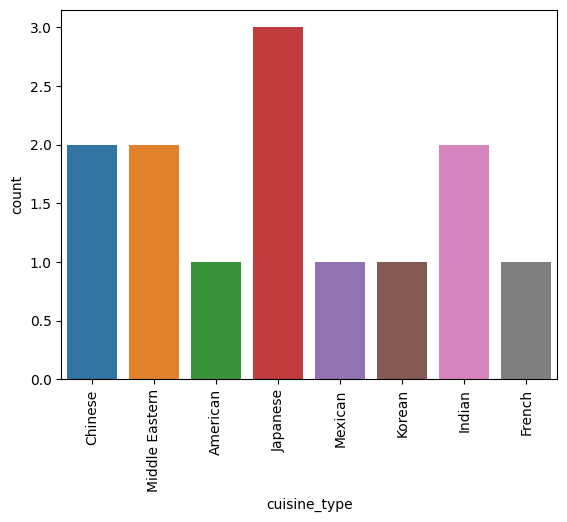

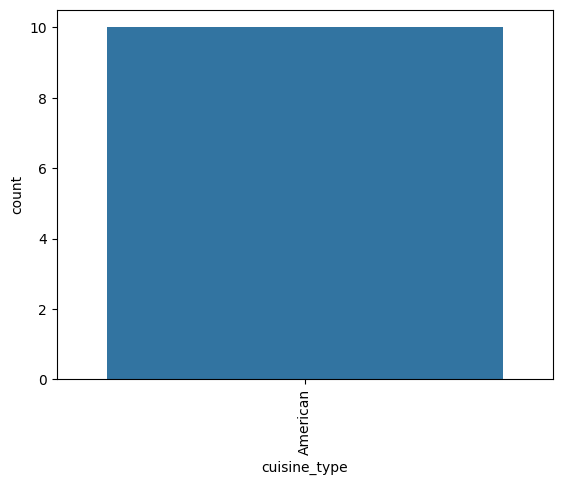

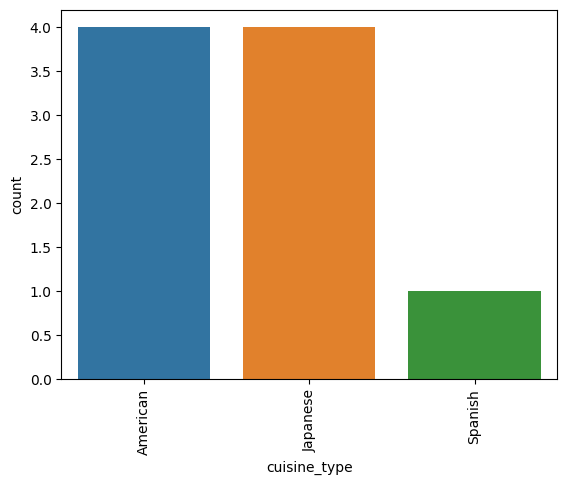

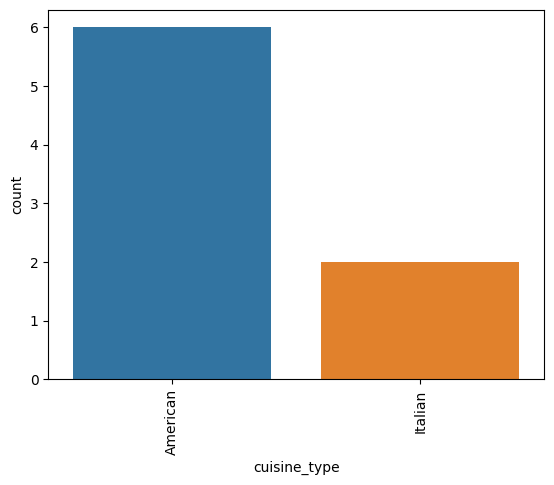

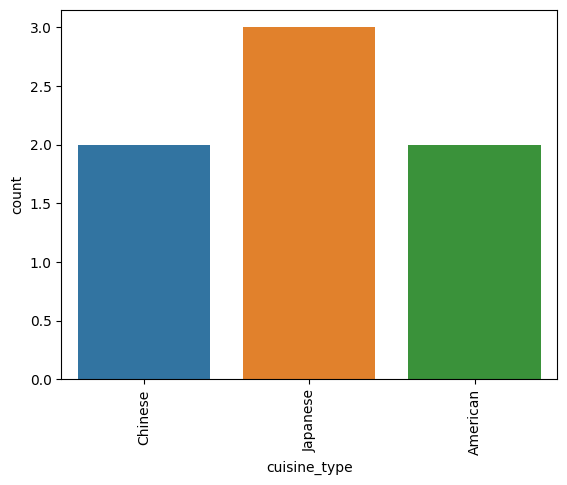

In [ ]:
#finding out if repeating customers like to try different cuisines
for i in customer_count.index.to_list():
  x = df.loc[(df['customer_id'] == i)]

  #Plot the barchart to show how many orders per cuisine type did returning customers make
  bar = sns.countplot(data=x,x='cuisine_type')
  plt.xticks(rotation = 90)
  plt.show()

#####Observations:

* Most customers prefer to try out similar different restaurants of familiar cuisines.

In [ ]:
#finding the rating of each restaurant by these repeating customers
for i in customer_count.index.to_list():
  x = df.loc[(df['customer_id'] == i)]

  #Finding the number of orders per restaurant
  restaurant = x.groupby(['restaurant_name'])['rating'].nunique()
  #Finding the average rating per restaurant
  mean_rating = x.groupby(['restaurant_name'])['nrating'].mean()
  #Combining the 2 data into a dataframe and rename the columns
  df1 = pd.concat([restaurant,mean_rating],axis = 1)
  df1.columns = ['number of orders','rating given']

  print(df1)
  print('-'*100)

                            number of orders  rating given
restaurant_name                                           
Dickson's Farmstand Meats                  1           4.0
Don's Bogam BBQ & Wine Bar                 1           NaN
Donburi-ya                                 2           5.0
Dos Caminos                                1           NaN
Han Dynasty                                2           3.0
Junoon                                     2           5.0
L'Express                                  1           NaN
ilili Restaurant                           2           3.5
----------------------------------------------------------------------------------------------------
                           number of orders  rating given
restaurant_name                                          
Bareburger                                4           3.8
Blue Ribbon Fried Chicken                 2           4.0
-----------------------------------------------------------------------------

#####Observations:

* From here, it can be seen that customers do not go back to the restaurants that they have not given a rating for. This might imply that those restaurants are so bad that they don't bother giving a response.
* There is also a pattern that customers like to revisit restaurants that they have given a higher rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
#Get the list of restaurants with rating more than 4
rating = df.groupby(['restaurant_name'])['nrating'].mean()
rating = rating.to_frame()
rating1 = rating[rating['nrating'] > 4]

#Get the list of restaurants with rating count more than 50
count = df.groupby(['restaurant_name'])['nrating'].count()
count = count.to_frame()
count1 = count[count['nrating'] > 50]

#Getting a list of the restaurants with both conditions met
idx = count1.index.intersection(rating1.index)

#Printing out the results
print('These companies are eligible:')

for i in idx:
  #Creating a dataframe for each restaurant
  df100 = df.loc[df['restaurant_name'] == i]
  rating100 = df100['nrating'].mean() #Average Rating per restaurant
  count100 =df100['nrating'].count() #Total order count per restaurant

  print('-'*50)
  print(i)
  print('Average Rating: ', round(rating100,2))
  print('Number of Rating: ', count100)


These companies are eligible:
--------------------------------------------------
Blue Ribbon Fried Chicken
Average Rating:  4.33
Number of Rating:  64
--------------------------------------------------
Blue Ribbon Sushi
Average Rating:  4.22
Number of Rating:  73
--------------------------------------------------
Shake Shack
Average Rating:  4.28
Number of Rating:  133
--------------------------------------------------
The Meatball Shop
Average Rating:  4.51
Number of Rating:  84


#### Observations:


The following 4 companies are eligible for the promotional offer:
1. Blue Ribbon Fried Chicken
2. Blue Ribbon Sushi
3. Shake Shack
4. The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
#Creating a df on the orders that were more than $20
morethan20 = df.loc[df['cost_of_the_order']>20]
#Creating a df on the orders that were more than $5 but less than $20
morethan15 = df.loc[(df['cost_of_the_order']<=20) & (df['cost_of_the_order']>5)]

#calculating the profit that Foodhub will get
revenue = morethan20['cost_of_the_order'].sum()*0.25 + morethan15['cost_of_the_order'].sum()* 0.15
round(revenue,2)

6166.3

#### Observations:


The company generated a net revenue of $6166.30 over the sampled period.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
#finding orders that took more than 60 minutes
morethan60 = len(df.loc[df['waiting time']>60])

#finding the percentage of that orders
percentage = morethan60 / len(df)*100

#round it up to 2 decimal place
round(percentage,2)

10.54

#### Observations:


Only 10.5% of orders took more than 60 mintues to get delivered after the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
#Getting the average of the delivery time per day of week
week_timing = df.groupby(['day_of_the_week'])['delivery_time'].mean()
week_timing

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:


* It can be seen that the average delivery time is longer on the weekdays as compared to the weekends. This might be due to the traffic being busier during weekdays

### Conclusion and Recommendations

1. Get more data
2. Japanese is good stuff

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:

1. There were more null ratings than other ratings.
2. American cuisine is the most famous cuisine, followedby Japanese and Italian.
3. Shake Shack is the most famous restaurant, doing almost twice as well as other restaurants.
4. More orders were made over the weekends than the weekdays.
5. Orders of cost tier 2 (between 12 to 17 dollars) were more commonly ordered.
6. Having more orders is the most important factor to earning more profit.
7. Japanese cuisine has more earning potential than American cuisine.
8. Cost tier 2 orders encourages more exploratory orders.
9. Cost tier 4 orders have very high earning potential than tier 3 orders.
10. Higher rating = more likely to revisit
11. More waiting time = less orders (weak)
12. Foodhub is currently earning 6166.30

### Recommendations:


1. Prioritize in recruiting more Japanese cuisine.The reason why American cuisine is earning so much more than Japanese cuisine is due to the existence of Shake Shack, and having much more American cuisine outlets. However, it was found that Japanese cuisine can earn more money with lesser orders, and are very famous among customers as well.
2. Make advertisement based on the notion that the customers are more free, not that ordering online will help to "save time". This can be seen by how there are way more weekend orders than weekday orders, even though there are more weekdays than weekends.
3. Suggested to separate the orders into 4 cost tiers according to their costs. This is observed from the distribution of costs in the univariate study. Moreover, specific tiers have specific advantages, and Foodhub can leverage on that to make more profits. For example..
* Tier 1 Lower than 11 dollars: Has more orders than tier 3 or 4, but earns the least money
* Tier 2 12 - 17 dollars: Cost tier 2 orders encourages revisitng customers to explore and order from different restaurants
* Tier 3 18 - 25 dollars: Nothing much commentable about tier 3
* Tier 4 higher than 26 dollars: Cost tier 4 orders is more profitable than cost tier 3 orders, even if there are more cost tier 3 orders

4. Prioritize having more cost tier 2 orders (12 to 17 dollars). This is due to the advantages explained in point 3.

5. Revamp the commission rate from the outlet chains accordingly to the cost tiers. Prioritize tier 2 and 4, but not tier 1 and 3. For example, set a lower commission rate from tier 1 and 3, but more commission rate from tier 2 and 4.

6. It has been studied that more rating = more revisiting. Recommended to give customers some motivation to rate, such as a point system.

7. Get more detailed weekday values, not just weekday or weekend. This will help us get better insight into which day will make customers more likely to order, and devise more strategies.

---